<a href="https://colab.research.google.com/github/Asandandlela16/Machine-Learning-Projects-by-Asanda-Ndlela/blob/main/Crop%20Health%20ML%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TRAINING A SIMPLE ML MODEL ON PLANT HEALTH

## Import the neccessary libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Loading and cleaning the dataset from my folders

In [6]:
from google.colab import files
uploaded = files.upload()


Saving crop_health.csv to crop_health (1).csv


In [7]:
df=pd.read_csv("crop_health.csv" )
df.head()

,NDVI,Soil_Moisture,Health
0,-0.250920,18.513293,healthy
1,0.901429,54.190095,healthy
2,0.463988,87.294584,unhealthy
3,0.197317,73.222489,healthy
4,-0.687963,80.656115,healthy


In [8]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NDVI           952 non-null    float64
 1   Soil_Moisture  950 non-null    float64
 2   Health         1000 non-null   object 
dtypes: float64(2), object(1)
memory usage: 23.6+ KB


,NDVI,Soil_Moisture
count,952.000000,950.000000
mean,-0.014226,50.469122
std,102.442995,29.233144
min,-999.000000,0.321826
25%,-0.536144,23.785238
50%,0.005316,51.873391
75%,0.497370,75.825702
max,999.000000,99.941373


In [9]:
df.isnull().sum()

,0
NDVI,48
Soil_Moisture,50
Health,0


In [10]:
df['Soil_Moisture']=df['Soil_Moisture'].fillna(df['Soil_Moisture'].mean())


In [11]:
df['NDVI']=df['NDVI'].fillna(df['NDVI'].mean())


In [12]:
df['NDVI']=df['NDVI'].clip(lower=-1, upper=1)


### CONVERT THE HEALTH COLUMN TO BINARY AS ML MODELS NEEDS NUMBERS

In [13]:
df['Health']=df['Health'].map({'healthy':1, 'unhealthy': 0 })


In [14]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NDVI           1000 non-null   float64
 1   Soil_Moisture  1000 non-null   float64
 2   Health         1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


,0
NDVI,0
Soil_Moisture,0
Health,0


### split features and labels

In [32]:
x=df[['NDVI','Soil_Moisture']].values
y=df['Health'].values

### Split into train and test sets

So I used 80% of the data to train the model and 20% to test it.

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x ,y , test_size=0.2, random_state=42)

### Train a Random Forest Model

In [56]:
model=RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

###Predict on the test set

In [57]:
y_pred=model.predict(x_test)

## CREATING A CONFUSION MATRIX

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Genrate Confusion Matrix

In [59]:
cm=confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n" ,cm)

Confusion Matrix: 
 [[30 50]
 [32 88]]


PLOT WITH SEABORN

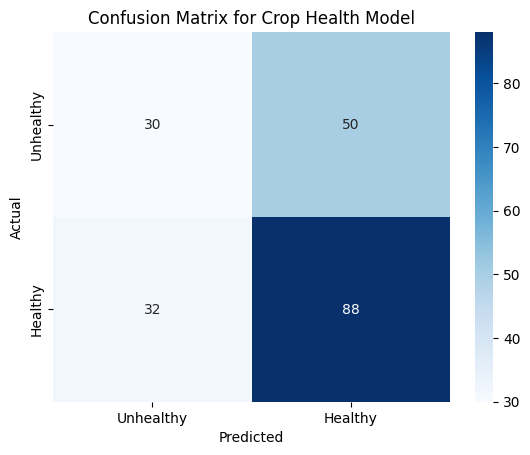

In [60]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Unhealthy', 'Healthy'],
            yticklabels=['Unhealthy', 'Healthy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Crop Health Model')
plt.show()


**So as you can see by the confusion matrix , we have 88 true positives(predicted correctly) and 30 true negatives. Again you can see that 50 crops were wrongly predicted to be healthy , 32 crops were predicted to be unhelthly while they were healthy.**

# Plotting an ROC curve

In [61]:
from sklearn.metrics import roc_curve, auc


### Get prediction probabilities

In [62]:
y_prob=model.predict_proba(x_test)[:,1]

#### compute a ROC curve and AUC

In [63]:
fpr, tpr, _=roc_curve(y_test, y_prob)
roc_auc=auc(fpr, tpr)

####Plot the curve

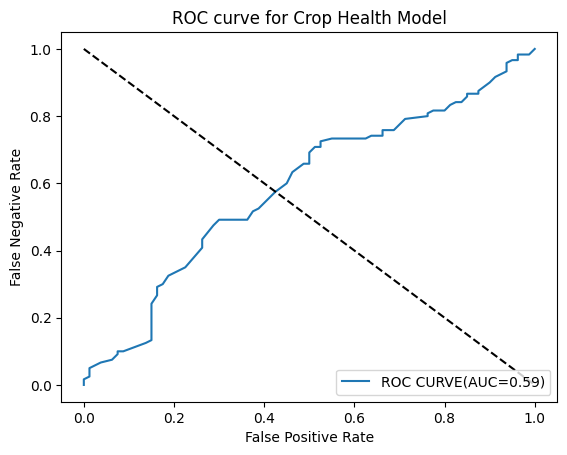

In [64]:
plt.plot(fpr, tpr, label=f'ROC CURVE(AUC={roc_auc:.2f})')
plt.plot([0, 1],[1, 0], 'k--') #This is our diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("False Negative Rate")
plt.title("ROC curve for Crop Health Model")
plt.legend(loc='lower right')
plt.show()
